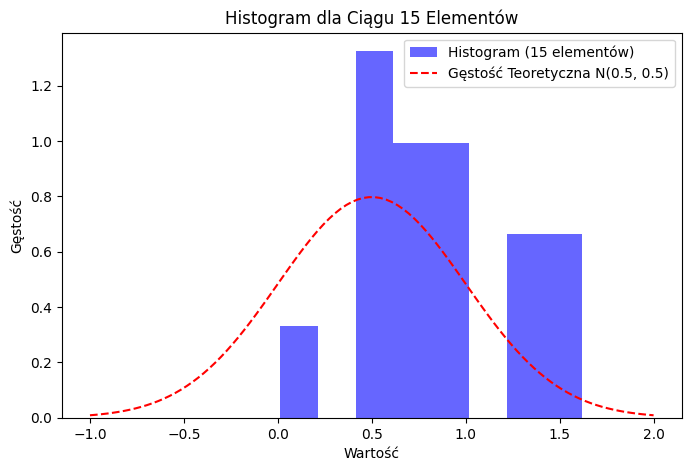

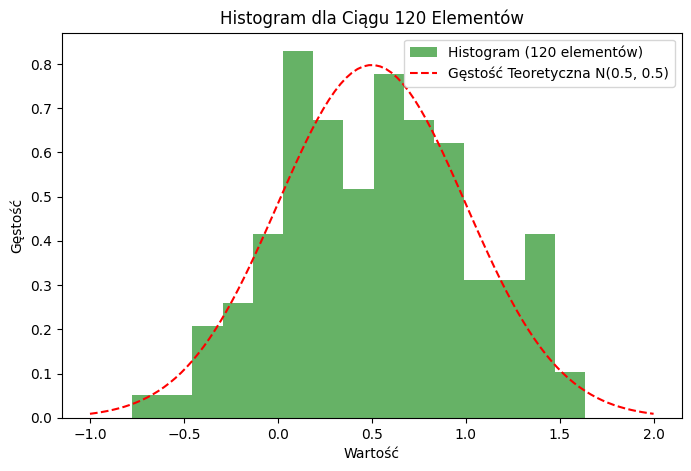

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Ustawienie ziarna dla powtarzalności wyników
np.random.seed(0)

# a) Wygenerowanie ciągów o długości 15 i 120 z rozkładu normalnego N(0.5, 0.5)
ciag_15 = np.random.normal(0.5, 0.5, 15)
ciag_120 = np.random.normal(0.5, 0.5, 120)

# b) Obliczenie statystyk dla obu ciągów
def oblicz_statystyki(ciag):
    statystyki = {
        'Średnia': np.mean(ciag),
        'Mediana': np.median(ciag),
        'Moda': stats.mode(ciag, keepdims=True)[0][0],
        'Odchylenie standardowe': np.std(ciag, ddof=1),
        'Wariancja': np.var(ciag, ddof=1),
        'Skośność': stats.skew(ciag),
        'Kurtoza': stats.kurtosis(ciag),
        'Pierwszy Kwantyl': np.percentile(ciag, 25)  # Przykładowa dodatkowa statystyka
    }
    return statystyki

statystyki_15 = oblicz_statystyki(ciag_15)
statystyki_120 = oblicz_statystyki(ciag_120)

# Wyświetlenie statystyk dla obu ciągów
statystyki_df = pd.DataFrame([statystyki_15, statystyki_120], index=['Ciąg 15', 'Ciąg 120'])

# c) Wykreślenie histogramów i teoretycznej gęstości rozkładu dla obu ciągów
wartosci_x = np.linspace(-1, 2, 100)
gestosc_teoretyczna = stats.norm.pdf(wartosci_x, 0.5, 0.5)

# Wykres dla ciągu o 15 elementach
plt.figure(figsize=(8, 5))
plt.hist(ciag_15, bins=8, density=True, alpha=0.6, color='b', label='Histogram (15 elementów)')
plt.plot(wartosci_x, gestosc_teoretyczna, 'r--', label='Gęstość Teoretyczna N(0.5, 0.5)')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.title('Histogram dla Ciągu 15 Elementów')
plt.legend()
plt.show()

# Wykres dla ciągu o 120 elementach
plt.figure(figsize=(8, 5))
plt.hist(ciag_120, bins=15, density=True, alpha=0.6, color='g', label='Histogram (120 elementów)')
plt.plot(wartosci_x, gestosc_teoretyczna, 'r--', label='Gęstość Teoretyczna N(0.5, 0.5)')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.title('Histogram dla Ciągu 120 Elementów')
plt.legend()
plt.show()




Cechy testu Shapiro-Wilka:
- Test Shapiro-Wilka sprawdza normalność rozkładu próbki, czyli porównuje rozkład danych z rozkładem normalnym. Działa najlepiej dla małych i średnich próbek.
- Wartość statystyki mieści się w przedziale od 0 do 1. Im bliżej 1, tym bardziej próbka przypomina rozkład normalny. Wartość poniżej 1 oznacza większe odchylenie od normalności.

Tezy:
>H0: Próbka pochodzi z rozkładu normalnego.

>HA: Próbka nie pochodzi z rozkładu normalnego.

In [25]:
print(shapiro(ciag_15))
print(shapiro(ciag_120))


ShapiroResult(statistic=0.9723368287086487, pvalue=0.8910271525382996)
ShapiroResult(statistic=0.9869590401649475, pvalue=0.3054826259613037)


Ciąg 15:
>Statystyka Shapiro-Wilka: 0.972

>Wartość p: 0.891

>Interpretacja: Wartość p jest znacznie większa od typowego poziomu istotności (np. 0.05), co oznacza, że nie mamy podstaw do odrzucenia hipotezy zerowej.



Ciąg 120:
>Statystyka Shapiro-Wilka: 0.987

>Wartość p: 0.306

>Interpretacja: Podobnie, wartość p dla ciągu 120 elementów jest większa od 0.05, co również sugeruje brak podstaw do odrzucenia hipotezy. 

Cechy testu t-studenta:
- uzywany do porównymania dwóch prób w rozkłądnie normalnym
- wykorzystywany zarówno do duych jak małych prób

Tezy:
> H0: Średnie z prób są równe 0.5. 

> HA: Średnie z prób nie są równe 0.5.

alfa = 5%


In [26]:
def t_test(sequence, expected_mean=0.5):
    sample_mean = np.mean(sequence)
    sample_std = np.std(sequence, ddof=1)
    n = len(sequence)
    
    
    t_stat = (sample_mean - expected_mean) / (sample_std / np.sqrt(n))
    p_value = 2 * stats.t.sf(np.abs(t_stat), n-1)
    
    return t_stat,p_value

t_stat_15, p_value_15 = t_test(ciag_15)
t_stat_120, p_value_120 = t_test(ciag_120)

In [27]:
v_15 = 2.1448
v_120 = 1.9801
alfa = 0.05

def decision(t,p,v,n):
    if abs(t) < abs(v) and p > alfa:
        print(f'Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby {n} jest równa 0')
    else:
        print(f'Odrzucamy hipotezę zerową. Zatem przyjmujemy hipotezę alternatywną. Średnia z próby {n} nie jest równa 0')

In [28]:
decision(t_stat_15,p_value_15,v_15,15)
decision(t_stat_120,p_value_120,v_120,120)

Odrzucamy hipotezę zerową. Zatem przyjmujemy hipotezę alternatywną. Średnia z próby 15 nie jest równa 0
Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 120 jest równa 0
